<a href="https://colab.research.google.com/github/bozhikov/SHE/blob/main/Deposition_by_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class MC_depos_pattern():
  import numpy as np
  Q,p,S,p00,DHa,Mg1,Mg2,M_iso,ro1,ro2,ro_iso=[],[],[],[],[],[],[],[],[],[],[]
 
  def __init__(self):
   print('input data : Q(m3/s),S(m),p(Pa),DHa(J/mol),Mg1,2,_iso(g/mol),ro1,2,_iso(g/cm3)')
    
  def __call__(self,temp):
   
   self.temp=temp
   
   G=self.Q*(self.temp/298.15)*101325/self.p    # {corrected flow}
   Ui= G/(3.14*(0.5*self.S)**2)          #  {linear gas velocity, m/s}
   tm = self.p00 * np.exp(self.DHa/(8.31447*self.temp))
   
   D298_Mg1=0.0043*298.15**(3/2)*(1/self.Mg1+1/self.M_iso)**(1/2)/((self.p/101325)*((self.Mg1/self.ro1)**(1/3)+(self.M_iso/self.ro_iso)**(1/3))**2)
   D298_Mg2=0.0043*298.15**(3/2)*(1/(self.Mg2)+1/(self.M_iso))**(1/2)/((self.p/101325)*((self.Mg2/self.ro2)**(1/3)+(self.M_iso/self.ro_iso)**(1/3))**2)
   D298_mix=0.6*D298_Mg1+0.4* D298_Mg2
   D_t=D298_mix*(self.temp/298.15)**1.75/10000
   vi = ((0.5*self.S)/G) * (8 * 8.314 * self.temp /(3.14*self.M_iso/1000))**(1/2) #  {n° collisions per unit lenght
   Ri = (1/Ui)/((1/Ui)+(vi*tm))      #  {ratio: residence time in the gas phase / overall residence time}
   Nm = (3.14*(0.5*self.S)**2*D_t/G)+(11-(16*Ri)+(6*Ri*Ri))*(G/(24*3.14*D_t)) # {Nm = average jump length, m}
   C=[Nm,Ui,tm]
   return C

In [ ]:
x1=MC_depos_pattern()


input data : Q(m3/s),S(m),p(Pa),DHa(J/mol),Mg1,2,_iso(g/mol),ro1,2,_iso(g/cm3)


In [ ]:
x1.Q=1e-5

In [ ]:
x1.p=120000

In [ ]:
x1.S=2e-3

In [ ]:
x1.p00=4e-13

In [ ]:
x1.DHa=62000

In [ ]:
x1.Mg1=4

In [ ]:
x1.Mg2=39.9

In [ ]:
x1.M_iso=179

In [ ]:
x1.Mnucl=179

In [ ]:
x1.ro1=0.145

In [ ]:
x1.ro2=1.4

In [ ]:
x1.ro_iso=13.594

In [ ]:
zz=x1(298)
zz

[0.025672600306733066, 1.3438697338470462, 5343.936414800918]

In [ ]:
type(x1.Mg_isotop)

int

In [ ]:
w=0.69/0.24
w

2.875

In [ ]:
print(x1)

In [ ]:
MC_depos_pattern.p=120000


In [ ]:
MC_depos_pattern.p00=4*10^(-13)

In [ ]:
MC_depos_pattern.S=2*10^(-3)

In [ ]:
MC_depos_pattern.DHa=68000

In [ ]:
MC_depos_pattern.Mg1=4

In [ ]:
MC_depos_pattern.Mg2=39.9

In [ ]:
MC_depos_pattern.Mg_iso=179

In [ ]:
MC_depos_pattern.ro1=0.145

In [ ]:
MC_depos_pattern.ro2=1.4

In [ ]:
MC_depos_pattern.ro_iso=13.594

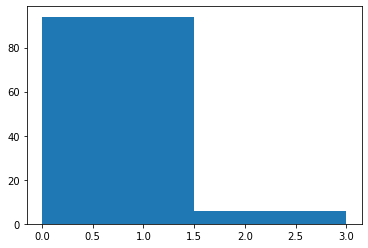

In [ ]:
import numpy as np
output= np.random.poisson(0.5, 100)
from matplotlib import pyplot as plt
count, bins, ignored = plt.hist( output, 3)
plt.show()


In [ ]:
y=np.mean(output)
y

0.47

In [ ]:
output

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0])

In [ ]:
class Nuclei_track:
  t,temp=[],[]
  import numpy as np
  def __iter__(self):
    self.a = 0
    self.coord=0
    self.temp=298
    return self

  def __next__(self):
    if self.a <self.t:
      
      xy=x1(self.temp)
      jump_aver=xy[0]*100
      velosity=xy[1]*100
      av_sor_time=xy[2]
      nu=1/jump_aver
      b=np.random.poisson(nu,1)
      f=b[0]==0
      self.a=self.a+f*av_sor_time+b[0]/velosity
      self.coord=self.coord+b[0]
      iron=[self.a,self.coord]
      return  self.coord
    else:
      raise StopIteration
      #return self.coord




In [ ]:
ac= Nuclei_track()

In [ ]:
dc=iter(ac)
for jj in dc:
  print(jj)

2
7
16
24
29
36
41
49
56
65
75
84


In [2]:
class input_species:
  c,g=[],[]
  import numpy as np
  def __init__(self,Number,Life_time):
    self.Number=Number
    self.Life_time=Life_time
    a=np.random.poisson(Life_time,Number)
    
    self.g.append(a)

    for i in range(len(a)):
     Nuclei_track.t=a[i]
     track = Nuclei_track()

     m = iter(track)
     b=list(m)
     b1=len(b)
     if b1>0 :
      self.c.append(b[b1-1])



In [ ]:
Hg_cal_1000=input_species(10000,0.69)

In [ ]:
Hg_cal_1000.c=0

In [ ]:
Hg_cal_1000.g=0

In [ ]:
class Gas_cromatogram:
  #St_1,St_2,St_3,St_4,St_5,St_6,St_7,St_8,St_9,St_10,St_11,St_12,St_13,St_14,St_15,St_16,input_data=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
 

  

  def __init__(self,*nuclei):
   self.nuclei=nuclei
   #self.input_data.append(nuclei)

   self.St1=0
   self.St2=0
   self.St3=0
   self.St4=0
   self.St5=0
   self.St6=0
   self.St7=0
   self.St8=0
   self.St9=0
   self.St10=0
   self.St11=0
   self.St12=0
   self.St13=0
   self.St14=0
   self.St15=0
   self.St16=0

  def distr_fig(self):
 
    for i in range(len(self.nuclei[0])):
     f1=self.nuclei[0][i]<1
     f2=self.nuclei[0][i]<2
     f3=self.nuclei[0][i]<3
     f4=self.nuclei[0][i]<4
     f5=self.nuclei[0][i]<5
     f6=self.nuclei[0][i]<6
     f7=self.nuclei[0][i]<7
     f8=self.nuclei[0][i]<8
     f9=self.nuclei[0][i]<9
     f10=self.nuclei[0][i]<10
     f11=self.nuclei[0][i]<11
     f12=self.nuclei[0][i]<12
     f13=self.nuclei[0][i]<13
     f14=self.nuclei[0][i]<14
     f15=self.nuclei[0][i]<15
     f16=self.nuclei[0][i]<16
     self.St1=self.St1+f1*1
     self.St2=self.St2+f2*1  #-self.St1
     self.St3=self.St3+f3*1  #-self.St1-self.St2
     self.St4=self.St4+f4*1  #-self.St1-self.St2-self.St3
     self.St5=self.St5+f5*1  #-self.St1-self.St2-self.St3-self.St4
     self.St6=self.St6+f6*1  #-self.St1-self.St2-self.St3-self.St4-self.St5
     self.St7=self.St7+f7*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6
     self.St8=self.St8+f8*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7
     self.St9=self.St9+f9*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8
     self.St10=self.St10+f10*1 #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9
     self.St11=self.St11+f11*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9-self.St10
     self.St12=self.St12+f12*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9-self.St10-self.St11
     self.St13=self.St13+f13*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9-self.St10-self.St11-self.St12
     self.St14=self.St14+f14*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9-self.St10-self.St11-self.St12-self.St13
     self.St15=self.St15+f15*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9-self.St10-self.St11-self.St12-self.St13-self.St14
     self.St16=self.St16+f16*1  #-self.St1-self.St2-self.St3-self.St4-self.St5-self.St6-self.St7-self.St8-self.St9-self.St10-self.St11-self.St12-self.St13-self.St14-self.St15
     # final sumations
  def final_data(self):
     self.St_1=self.St1
     self.St_2=self.St2-self.St1
     self.St_3=self.St3-self.St2
     self.St_4=self.St4-self.St3
     self.St_5=self.St5-self.St4
     self.St_6=self.St6-self.St5
     self.St_7=self.St7-self.St6
     self.St_8=self.St8-self.St7
     self.St_9=self.St9-self.St8
     self.St_10=self.St10-self.St9
     self.St_11=self.St11-self.St10
     self.St_12=self.St12-self.St11
     self.St_13=self.St13-self.St12
     self.St_14=self.St14-self.St13
     self.St_15=self.St15-self.St14
     self.St_16=self.St16-self.St15




In [ ]:
y1=Gas_cromatogram(Hg_cal_1000.c)


In [ ]:
y1.St_1,y1.St_2,y1.St_3,y1.St_4,y1.St_5,y1.St_6,y1.St_7,y1.St_8,y1.St_9,y1.St_10,y1.St_11,y1.St_12,y1.St_13,y1.St_14,y1.St_15,y1.St_16=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
y1.distr_fig()

In [ ]:
y1.final_data()

In [ ]:
y1.St7

1531

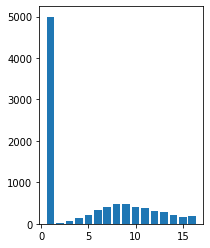

In [ ]:
output=[y1.St_1,y1.St_2,y1.St_3,y1.St_4,y1.St_5,y1.St_6,y1.St_7,y1.St_8,y1.St_9,y1.St_10,y1.St_11,y1.St_12,y1.St_13,y1.St_14,y1.St_15,y1.St_16]
num_strip=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.bar(num_strip, output)




plt.show()


In [ ]:
for i in range(len(y1.input_data[0][0])):
 zz=y1.input_data[0][0][i] 
 print(zz)

1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0


In [ ]:
Hg_cal_1000.c

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
y1.distr_fig()

TypeError: ignored

In [ ]:
b=[]
import numpy as np
a=np.random.poisson(2,3)
for i in range(3):
  b.append(a[i])


In [ ]:
input_species(2,4)

In [ ]:
input_species.c

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1]

In [ ]:
input_species.g

[[array([3, 2])],
 [array([5, 8])],
 [array([6, 4])],
 [array([5, 0])],
 [array([4, 6])],
 [array([4, 2])]]

In [ ]:
class Example:
    def __init__(self):
        print("Instance Created")
      
    # Defining __call__ method
    def __call__(self):
        print("Instance is called via special method")
  
# Instance created
e = Example()


Instance Created


Instance is called via special method


In [ ]:
import numpy as np
output= np.random.poisson(5, 1)
output

array([10])

In [ ]:
from matplotlib import pyplot as plt